Jurij  
101

# Homework 1: Python basics and a little plotting

** Submit this notebook to bCourses to receive a credit for this assignment.**

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW01.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Satellite Altitudes

[Adapted from Newman, Exercise 2.2] A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every $T$ seconds. The altitude $h$ above the Earth's surface that the satellite must have is $$ h = \left( \frac{G M T^2}{4 \pi^2} \right)^{1/3} - R, $$ where $G = 6.67 \times 10^{-11}~\text{m}^3~\text{kg}^{-1}~\text{s}^{-2}$ is Newton's gravitational constant, $M = 5.97 \times 10^{24}~\text{kg}$ is the mass of the Earth, and $R = 6371~\text{km}$ is its radius.

**1a.** Write a program that, for a given value of $T$ (entered as a variable T in a cell), calculates and prints out the correct altitude in meters, kilometers, and miles, with one decimal place for each result.

*Output for 1a*: When the code cell for this part of the problem is entered, it should specify (in the comments or the Markdown cell above) what units of $T$ are assumed. The program should print out the correct altitude in meters, kilometers, and miles, with one decimal place for each result.

In [9]:
import numpy as np

# Define constants
G = 6.67 * 10 ** (-11) # Gravitational const.
M = 5.97 * 10 ** 24 # Mass of Earth in kgs
R = 6371 * 10 ** 3 # Radius of Earth in meters

def altitude(T): 
    """
    Takes a time T in seconds and returns the altitude in meters, kilometers, and miles to 1 d.p
    for a satelite be in stable orbit around Earth with a period T seconds.
    Args:
    T -> Int
    Returns:
    altitudes -> Dict
    """
    height_meters = ((G * M * T ** 2) / (4*(np.pi) ** 2)) ** (1/3) - R # Calculated altitude in meters
    height_kilometers = height_meters / 1000 # Altitude in kilometers
    height_miles = 0.621371 * height_kilometers # Altitude in miles
    
    # Create a dictionary returning the altitudes to 1 d.p
    altitudes = {
        "meters": round(height_meters, 1), 
        "kilometers": round(height_kilometers, 1), 
        "miles": round(height_miles, 1)
        }

    # Return the dict
    return altitudes

# Get user input
T = int(input("Please enter a value for T in seconds: "))
# Unpack function output
altitudes = altitude(T)
meters, kilometers, miles = altitudes["meters"], altitudes["kilometers"], altitudes["miles"]
# Print the information
print(f"The satelite orbits at {meters} meters ({kilometers} km, {miles} mls).")
    

The satelite orbits at 21599916108.2 meters (21599916.1 km, 13421561.5 mls).


*Output for 1b and 1c:* Use code cells to carry out the desired calculations, and Markdown cells to present and discuss your results.

**1b.** Use your program to calculate the altitudes of satellites that orbit the Earth once a day (so-called "geosynchronous" orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?

In [19]:
# Get orbital altitude for a geosynchronous satelite
altitudes = altitude(24 * 60 * 60)
height_kilometers = altitudes["kilometers"]
print(f"A geosynchronous satelite orbits at {height_kilometers} km.")

# Do the same for 90 minutes and 45 minutes
altitudes = altitude(90 * 60)
height_kilometers = altitudes["kilometers"]
print(f"A satelite's stable orbiting altitude with a period of 90 minutes is {height_kilometers} km.")
altitudes = altitude(45 * 60)
height_kilometers = altitudes["kilometers"]
print(f"A satelite's stable orbiting altitude with a period of 45 minutes is {height_kilometers} km.")

A geosynchronous satelite orbits at 35855.9 km.
A satelite's stable orbiting altitude with a period of 90 minutes is 279.3 km.
A satelite's stable orbiting altitude with a period of 45 minutes is -2181.6 km.


The last of these gives a negaitve value for h. This means it is physically impossible for a satelite to orbit earth once every 45 minutes.

**1c.** Technically a geosynchronous satellite is one that orbits the Earth once per *sidereal day*, which is 23.93 hours, not 24 hours. Why is this? And how much difference will it make to the altitude of the satellite?

In [21]:
# Calculate the altitude for a full 24h day and a shorter 23.93h day
height_kilometers_full_day = altitude(24 * 60 * 60)["kilometers"]
height_kilometers_shorter_day = altitude(23.93 * 60 * 60)["kilometers"]
# Calculate the difference to 1 d.p
difference = abs(round(height_kilometers_full_day - height_kilometers_shorter_day, 1))

print(f"A satelite with an orbital period of 24h orbits at an altitude of {height_kilometers_full_day} km.")
print(f"A satelite with an orbital period of 23.93h orbits at an altitude of {height_kilometers_shorter_day} km.")
print(f"This makes the difference between their orbits {difference} km.")

A satelite with an orbital period of 24h orbits at an altitude of 35855.9 km.
A satelite with an orbital period of 23.93h orbits at an altitude of 35773.8 km.
This makes the difference between their orbits 82.1 km.


Sidereal orbit matches the rotation of Earth relative to the starts (23.93h) rather than the Earth's rotation relative to the sun (24h). This is probably quite useful to astronomers who want to be able to study distant stars reliably. Difference is about 82.1km less for the sidereal orbit.

#### Hints

Be very careful of units! Unlike wolframalpha.com, python is oblivious to what units your various numbers represent. You need to carefully keep track of them to make sure that your units work out. Not converting units properly can lead to [very expensive disasters](https://en.wikipedia.org/wiki/Mars_Climate_Orbiter) or just wrong scientific results ...

Remember to comment your code and use descriptive variable names so others (and future you) can understand what you're doing!

## Problem 2: Perfect Hardboiled Eggs

[Adapted from Langtangen, Exercise 1.12. You may derive the formula in Physics 112 or Physics 89] As an egg cooks, the proteins first denature and then coagulate. When the temperature exceeds a critical point, reactions begin and proceed faster as the temperature increases. In the egg white the proteins start to coagulate for temperatures above 63 C, while in the  yolk the proteins start to coagulate for temperatures above 70 C. For a soft boiled egg, the white needs to have been heated long enough to coagulate at a temperature above 63 C, but the yolk should not be heated above 70 C. For a hard boiled egg, the center of the yolk should be allowed to reach 70 C.

The following formula expresses the time $t$ it takes (in seconds) for the center of the yolk to reach the temperature $T_y$ (in Celsius degrees): $$ t = \frac{M^{2/3} c \rho^{1/3}}{K \pi^2 (4\pi/3)^{2/3}} \ln \left[ 0.76 \frac{T_0 - T_w}{T_y - T_w} \right] . $$ Here, $M$, $\rho$, $c$, and $K$ are properties of the egg:
* $M$ is the mass,
* $\rho$ is the density,
* $c$ is the specific heat capacity, and 
* $K$ is the thermal conductivity.

Relevant values are
* $M = 64~\text{g}$ for a large egg (USA size XL: en.wikipedia.org/wiki/Chicken_egg_sizes),
* $\rho = 1.0378~\text{g cm}^{-3}$,
* $c = 3.7~\text{J g}^{-1}\,\text{K}^{-1}$, and
* $K = 5.4 \cdot 10^{-3}~\text{W cm}^{-1}\,\text{K}^{-1}$.

Furthermore,
* $T_w$ is the temperature (in C degrees) of the boiling water, and
* $T_0$ is the original temperature (in C degrees) of the egg before being put in the water.

Suppose we want our eggs hard-boiled. Implement the formula in a program, set $T_w = 100~\text{C}$ and $T_y = 70~\text{C}$, and compute $t$ for a large egg taken from the fridge ($T_0 = 4~\text{C}$) and from room temperature ($T_0 = 20~\text{C}$). Also compute the results for a small egg ($M = 42~\text{g}$).

print(str(round(boil_time(64,20)/60,3)))
print(str(round(boil_time(64,20)/60,2)))

*Output for 2:*
When you run your code cell, it should produce the following text, with your numbers instead of the `TTT`, `MMM`, and `SSS` placeholders:

    To hard-boil a large egg taken directly from the fridge, cook it for TTT minutes (MMM min, SSS sec).
    To hard-boil a small egg taken directly from the fridge, cook it for TTT minutes (MMM min, SSS sec).
    To hard-boil a large egg starting from room temperature, cook it for TTT minutes (MMM min, SSS sec).
    To hard-boil a small egg starting from room temperature, cook it for TTT minutes (MMM min, SSS sec).

The `TTT` placeholders should be values in minutes to two decimal places. The `MMM` and `SSS` placeholders should be rounded to the nearest minute/second, with no decimal places. For example,

    To hard-boil a large egg taken directly from the fridge, cook it for 56.78 minutes (56 min 47 sec).



In [30]:
#Define constants
rho = 1.0378
c = 3.7
K = 5.4 * 10 ** (-3)

def boil_time(M, T_0): 
    """
    Returns the boil time of an egg based on its mass and initial temperature.
    Args:
    M -> Int
    T_0 -> Int
    Returns:
    time -> Int
    """
    time = (M ** (2 / 3) * c * rho ** (1 / 3)) / (K * (np.pi ** 2) * (4 * np.pi / 3) ** (2 / 3)) * np.log(0.76 * (T_0 - 100) / (70 - 100))
    return time

# Large egg from fridge
time = boil_time(64, 4)
print(f"To hard-boil a large egg taken directly from the fridge, cook it for {round(time / 60, 2)} minutes ({round(time / 60)} min , {round(time % 60)} sec).")

# Small egg from fridge
time = boil_time(42, 4)
print(f"To hard-boil a small egg taken directly from the fridge, cook it for {round(time / 60, 2)} minutes ({round(time / 60)} min , {round(time % 60)} sec).")

# Big egg room temp
time = boil_time(64, 20)
print(f"To hard-boil a large egg starting from room temperature, cook it for {round(time / 60, 2)} minutes ({round(time / 60)} min , {round(time % 60)} sec).")

# Small egg room temp
time = boil_time(42, 20)
print(f"To hard-boil a small egg starting from room temperature, cook it for {round(time / 60, 2)} minutes ({round(time / 60)} min , {round(time % 60)} sec).")

To hard-boil a large egg taken directly from the fridge, cook it for 6.41 minutes (6.0 min , 25.0 sec).
To hard-boil a small egg taken directly from the fridge, cook it for 4.84 minutes (5.0 min , 50.0 sec).
To hard-boil a large egg starting from room temperature, cook it for 5.1 minutes (5.0 min , 6.0 sec).
To hard-boil a small egg starting from room temperature, cook it for 3.85 minutes (4.0 min , 51.0 sec).


#### Hints

Writing the entire formula in one line is difficult to type, difficult to read, difficult to debug---and you have to retype the entire calculation just to change one piece of it. Try breaking it down in smaller chunks assigned to variables, and combine those chunks to produce the final result.

Beware of integer division!

Remember to comment your code and use descriptive variable names so others (and future you) can understand what you're doing!

## Problem 3: Estimating Half-Life

[Adapted from Ayars, Problem 0-3] The data in file Ba137.txt (available here: https://raw.githubusercontent.com/celegante/code_chapter_0-_github/master/Ba137.txt) is actual data from a radioactive decay experiment; the first column is the number of decays $N$, the second is the time $t$ in seconds. We'd like to know the half-life $t_{1/2}$ of $^{137}\text{Ba}$. It should follow the decay equation $$ N = N_0 e^{-\lambda t} $$ where $\lambda = \frac{\log 2}{t_{1/2}}$. Using the techniques you've learned from the lecture and workshop, load the data from the file Ba137.txt into appropriately-named variables. Experiment with different values of $N$ and $\lambda$ and plot the resulting equation on top of the data. (Python uses `exp()` to calculate the exponential function: i.e. `y = A*exp(-L*time)` ) Don't worry about automating this process yet (unless you *really* want to!) just try adjusting things by hand until the equation matches the data pretty well. What is your best estimate for $t_{1/2}$?

*Output for 3:*
When you run your code cell, it should produce a well-labeled plot with both the data and your curve of best fit. It should also print a message to the terminal which says, "My best estimate for the half life is $x$", where $x$ is your estimate with units.

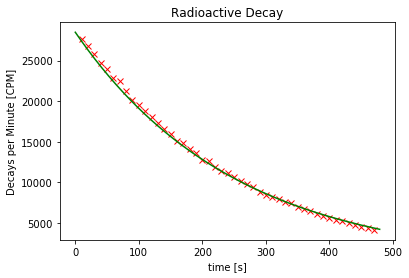

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### Load the data
data = np.loadtxt("Ba137.txt")

### Devide up data into cpm (counts per minute) and time
cpm = [elem[0] for elem in data]
time = [elem[1] for elem in data]
    
time2 = np.arange(0,480,1)
plt.figure()    # Start a clean figure for your first plot

### Your code for the first plot here!
plt.title("Radioactive Decay") #Add a title and label the axes 
plt.xlabel("time [s]")
plt.ylabel("Decays per Minute [CPM]")
plt.plot(time, cpm, 'rx') 
plt.plot(time2, 28500 * np.exp(-0.004 * time2), 'g') #This overlays the exponential decay function in green

#### Hints

Remember to comment your code and use descriptive variable names so others (and future you) can understand what you're doing!

In [8]:
t_halflife = np.log10(2)/0.004
print("Estimated halflife = " + str(round(t_halflife,1)) + " seconds.")

Estimated halflife = 75.3 seconds.
